### Statistical Analysis Project- Analyzing Real World Data


In [13]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv(url)

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


<Axes: xlabel='total_bill', ylabel='Count'>

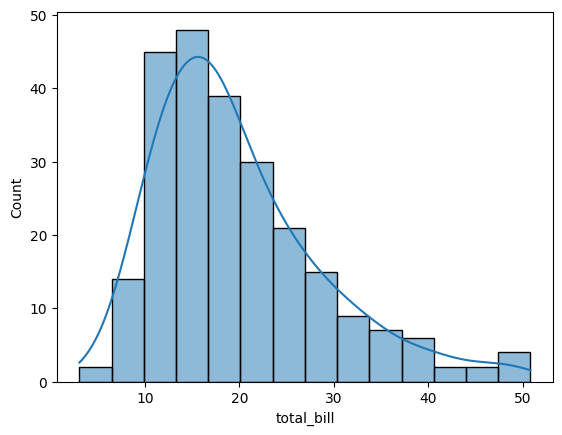

In [16]:
sns.histplot(df["total_bill"], kde=True)

In [21]:
# del df["sex"]
# del df["smoker"]
# del df["day"]
# del df["time"]


# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [24]:
from scipy.stats import ttest_ind

#separarte dataset for sex 
male_tips= df[df['sex']=='Male']['tip']
female_tips = df[df['sex']=='Female']['tip']


In [ ]:
t_stat , p_value = ttest_ind(male_tips, female_tips)
print("T-statistic: ", t_stat)
print("P-value ", p_value)


T-statistic:  1.387859705421269
P-value  0.16645623503456755
157


In [26]:
alpha = 0.05

if p_value <= alpha:
    print("Reject all null hypothesis : significant defference ")
else:
    print("Fail to reject all null hypothesis: no significant differnce ")

Fail to reject all null hypothesis: no significant differnce 


Slope :  0.10502451738435337
Interscept:  0.9202696135546731
R-Squared:  0.45661658635167657


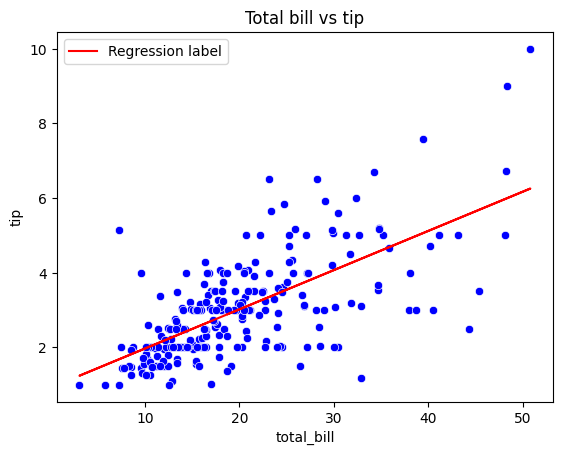

In [29]:
from sklearn.linear_model import LinearRegression
x = df['total_bill'].values.reshape(-1,1)
y = df['tip'].values

model = LinearRegression()
model.fit(x,y)

print("Slope : ", model.coef_[0])
print("Interscept: ", model.intercept_)
print("R-Squared: ", model.score(x,y))

sns.scatterplot(x=df['total_bill'], y=df['tip'], color="blue")
plt.plot(df["total_bill"], model.predict(x), color="red", label="Regression label")
plt.title("Total bill vs tip")
plt.legend()
plt.show()